In [19]:
from sklearn.datasets import make_blobs
features, _ = make_blobs(n_samples=100, centers=3, n_features=2,
cluster_std=0.2, random_state=0)

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
features[:5]

array([[2.17058568, 0.85600391],
       [0.79717677, 4.38116783],
       [2.24471791, 0.86666164],
       [0.65349051, 4.26123927],
       [0.76655949, 4.01978374]])

In [23]:
_[:5]

array([1, 0, 1, 0, 0])

In [24]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [25]:
features[:5]

array([[ 1.10289722, -1.37943148],
       [ 0.19639771,  1.19447238],
       [ 1.15182717, -1.37164972],
       [ 0.10155959,  1.10690636],
       [ 0.1761892 ,  0.93060723]])

In [26]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [27]:
kmeans.fit(features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [28]:
kmeans.inertia_


3.7332072457882046

In [29]:
kmeans.n_iter_


2

In [30]:
kmeans.cluster_centers_

array([[ 0.29835451,  1.12704509],
       [ 1.03787938, -1.28270105],
       [-1.34527494,  0.12150307]])

In [31]:
kmeans.labels_[:5]

array([1, 0, 1, 0, 0], dtype=int32)

In [32]:
def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [33]:
def evaluate(X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, kmeans.cluster_centers_)
            centroid_idx = np.argmin(dists)
            centroids.append(kmeans.cluster_centers_[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idx

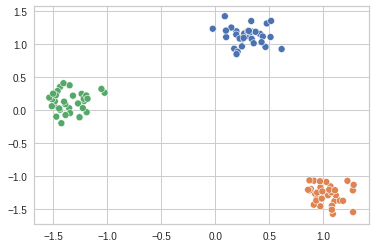

In [34]:
import numpy as np
class_centers, classification = evaluate(features)
sns.scatterplot(x=[X[0] for X in features],
                y=[X[1] for X in features],
                hue=_,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.cluster_centers_],
         [y for _, y in kmeans.cluster_centers_],
         '+',
         markersize=10,
         )
plt.show()

In [35]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

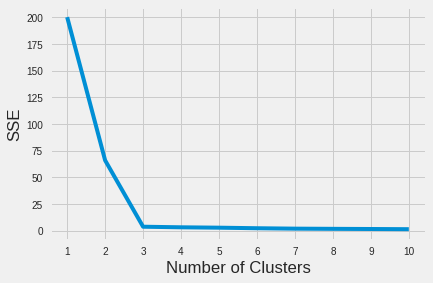

In [36]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [37]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_coefficients.append(score)
score

0.3222770300066866

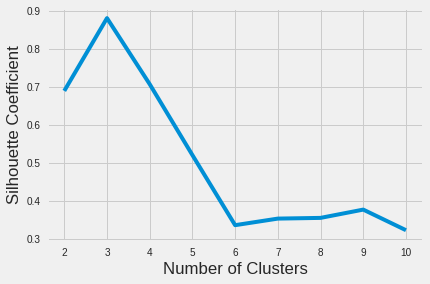

In [38]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

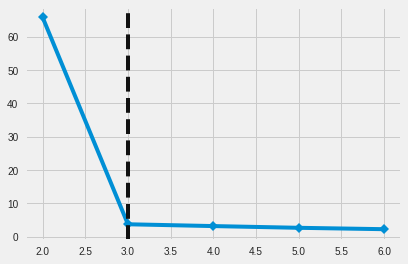

In [39]:
visualizer = KElbowVisualizer(
            KMeans(random_state=0),
            k=6,
            timings=False,
            locate_elbow=True,
        )
visualizer.fit(features)
assert len(visualizer.k_scores_) == 5
assert visualizer.elbow_value_ == 3

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


array([1], dtype=int32)

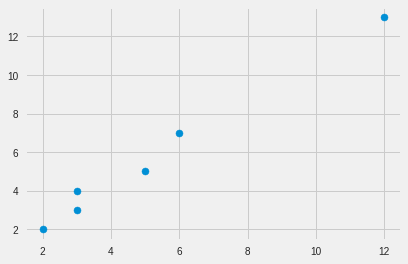

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
#x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
X1 = np.array([[2,2],[3,4],[6,7],[5,5],[3,3],[12,13]])
#X1.shape()
X2 = np.array([2,3,4])
plt.scatter(X1[:,0], X1[:,1])
centroid = np.array([[2,2],[3,4],[6,7]])
kmeans = KMeans(n_clusters=3, init=centroid).fit(X1)
kmeans.cluster_centers_
kmeans.labels_
#print("Number of iterations " , kmeans.n_iter_)
kmeans.predict([[8,8]])

In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
#digits dataset from scikit learn consists of 8x8 pixel images of digits
#Data plotting and visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
digits = load_digits()

In [43]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [44]:
digits.data[0:3]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [45]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [46]:
kmeans = KMeans(
    init="random",
    n_clusters=10,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(digits.data)
clusters=kmeans.fit_predict(digits.data)


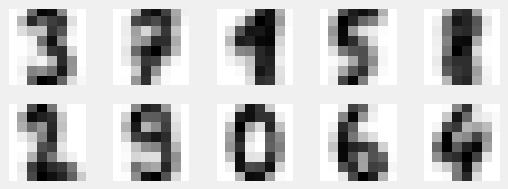

In [47]:
fig, ax = plt.subplots(2, 5, figsize = (8,3)) 
centers = kmeans.cluster_centers_.reshape(10,8,8)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks = [], yticks = [])
  axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary)

In [48]:
labels = np.zeros_like(clusters) 
print(f"The labels are : {labels}")
print(f"\nThe size of labels is : {labels.shape}")
print("The mask values are : ")
for i in range(10):
 mask = (clusters == i)
 print(mask)
 labels[mask] = mode(digits.target[mask])[0]

The labels are : [0 0 0 ... 0 0 0]

The size of labels is : (1797,)
The mask values are : 
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False  True  True ...  True False False]
[False False False ... False False False]
[False False False ... False  True  True]
[ True False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]


<ipython-input-48-5cfe0ce726d5>:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


**Exercise**

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
acc = accuracy_score(digits.target,labels)
print('Accuracy is: {}'.format(acc))

precision = precision_score(digits.target,labels,average='macro')
print('Precision is: {}'.format(precision))

recall = recall_score(digits.target,labels,average='macro')
print('Recall is: {}'.format(recall))

Accuracy is: 0.7913188647746243
Precision is: 0.7457548634613366
Recall is: 0.7888434355896105


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


New centers:  [[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]
labels:  [0 2 1 0 1 1 2 0]
Number of iterations  4


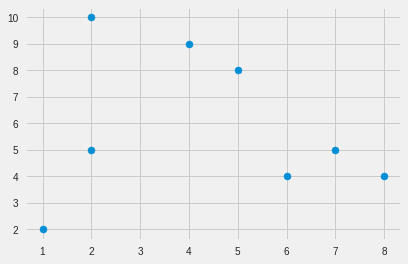

In [62]:
X1 = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
#X1.shape()
plt.scatter(X1[:,0], X1[:,1])
centroid = np.array([[2,10],[5,8],[1,2]])
kmeans = KMeans(n_clusters=3, init=centroid).fit(X1)
print("New centers: ",kmeans.cluster_centers_)
print("labels: ",kmeans.labels_) 
print("Number of iterations " , kmeans.n_iter_)